In [164]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import math

In [165]:
df = pd.read_csv('data_proj_414.csv',index_col=0)

print(df)

               X          Y  Potter  Weasley  Granger  Trip  Close  Far
1       2.466284   3.582118       1        0        0     1      0    0
2       5.508336   8.295713       1        0        0     1      0    0
3       6.784481  11.851393       1        0        0     1      0    0
4       7.550499  14.411812       1        0        0     1      0    0
5      10.402096  17.218079       1        0        0     1      0    7
...          ...        ...     ...      ...      ...   ...    ...  ...
24090  40.615083  74.485727       0        0        1    49      4   16
24091  41.485127  74.335721       0        0        1    49      1    8
24092  41.275887  76.995216       0        0        1    49      1    2
24093  42.176981  76.159014       0        0        1    49      0    1
24094  40.530502  76.063805       0        0        1    49      1    8

[24094 rows x 8 columns]


Plot "Close" data: 

In [166]:
resolution_factor=1
map_close = np.zeros((107*resolution_factor, 107*resolution_factor))
X_close = []
Y_close = []
close = []
min_resolution_x=[]
min_resolution_y=[]
one_grid_count=np.zeros((107*resolution_factor, 107*resolution_factor))
max_one_grid_count_=0
for i in range(1, len(df['X'])+ 1):
  if i<len(df['X']):
    min_resolution_x.append(abs(df['X'][i]- df['X'][i+1])) #min(min_resolution_x,abs(df['X'][i]- df['X'][i+1]))
    min_resolution_y.append(abs(df['Y'][i]- df['Y'][i+1]))#min(min_resolution_y,abs(df['Y'][i]- df['Y'][i+1]))
  x =int(round(df['X'][i],1 )*resolution_factor)  #math.floor(df['X'][i])
  y =int(round(df['Y'][i],1 )*resolution_factor) #math.floor(df['Y'][i])
  one_grid_count[x][y]+=1
  max_one_grid_count_=max(max_one_grid_count_,one_grid_count[x][y])
  if (df['Close'][i] > map_close[x][y]):
    map_close[x][y] = df['Close'][i]

max_one_grid_count=np.zeros(int(max_one_grid_count_)+1)
for i in range(1, len(df['X'])+ 1):
    x =int(round(df['X'][i],1 )*resolution_factor)
    y =int(round(df['Y'][i],1 )*resolution_factor)
    max_one_grid_count[int(one_grid_count[x][y])]+=1

print(one_grid_count)
print(max_one_grid_count)
file_name='close_resolution_'+str(resolution_factor)+'.txt'
with open(file_name, 'w') as f:
  for i in range(0,107*resolution_factor):
    for j in range(0,107*resolution_factor):
      #print(one_grid_count[i][j]+"\r")
      f.write(str(one_grid_count[i][j])+"\r")

print(min_resolution_x)

print(min_resolution_y)


for i in range(0,107*resolution_factor):
  for j in range(0,107*resolution_factor):
    X_close.append(i)
    Y_close.append(j)
    close.append(map_close[i][j])


[[ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  2. 10. ...  0.  0.  0.]
 [ 3.  9. 13. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]]
[   0.  472.  582.  747.  756.  885.  948.  833. 1032.  846.  980.  693.
  708.  741.  630.  795.  672.  629.  756.  551.  460.  735.  638.  598.
  360.  525.  494.  405.  448.  464.  510.  279.  320.  495.  340.  210.
  396.  259.  228.  195.  120.  246.  168.   43.  176.  135.    0.  235.
   48.   98.   50.   51.   52.    0.    0.    0.    0.   57.]
[3.0420518310891405, 1.2761450817082496, 0.7660186491487897, 2.8515970236727, 1.8407429361165004, 1.1567964202633991, 1.3130890981105008, 0.7496401687821006, 0.18049931875499858, 1.0598428715324015, 0.053850440774802166, 2.5904440622055027, 0.027150774616401918, 2.3241516237930995, 2.1613858417725, 1.5481261776987019, 0.3335130039512002, 0.4402756950333995, 2.2738816727800994, 0.08021912717260093, 2.3630689230402986, 0.39194903009580173, 0.5672850261

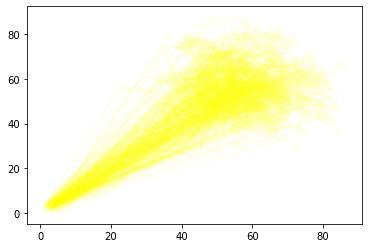

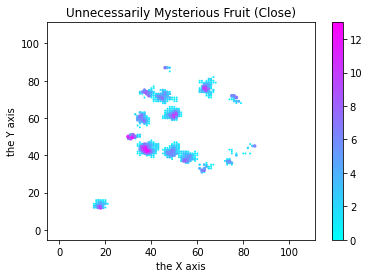

In [167]:



ntrip = 49

#fig=plt.figure()
#fig.show()
#ax=fig.add_subplot(111)
cmap = plt.cm.get_cmap('spring')
for i in range(1, ntrip+1): 
    rs_df = df.loc[df['Trip'] == i]
    c = cmap(100/ntrip)
    plt.plot(rs_df['X'], rs_df['Y'], color = c, alpha = 0.1)

plt.show()
# Change color with c and transparency with alpha. 
# I map the color to the X axis value.
close_plt = plt.scatter(X_close, Y_close, s = close, c = close, cmap="cool", alpha=1, linewidth=1)
 
# Add titles (main and on axis)
plt.xlabel("the X axis")
plt.ylabel("the Y axis")
plt.colorbar(close_plt)
plt.title("Unnecessarily Mysterious Fruit (Close)")
pic_name='Unnecessarily Mysterious Fruit (Close)'+str(resolution_factor)+'.png'
plt.savefig(pic_name)
# Show the graph
plt.show()

ValueError: s must be a scalar, or float array-like with the same size as x and y

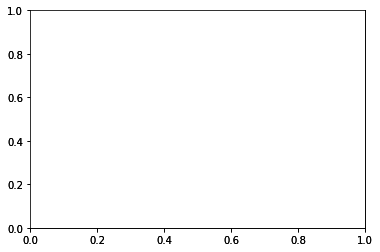

In [168]:

# Change color with c and transparency with alpha. 
# I map the color to the X axis value.
close_plt = plt.figure()
close = close_plt.add_subplot(111)
path = close_plt.add_subplot(111)
plt.scatter(X_close, Y_close, s = close, c = close, cmap="cool", alpha=0.4, linewidth=2)
 
# Add titles (main and on axis)
plt.xlabel("the X axis")
plt.ylabel("the Y axis")
plt.colorbar(close_plt)
plt.title("Unnecessarily Mysterious Fruit (Close)")


ntrip = 49
cmap = plt.cm.get_cmap('pink')
for i in range(1, ntrip+1): 
    rs_df = df.loc[df['Trip'] == i]
    c = cmap(float(i)/ntrip)
    path.plot(rs_df['X'], rs_df['Y'], color = c, alpha = 0.5)

# Show the graph
plt.show()

Plot the "Far" data

In [ ]:
map_far = np.zeros((107, 107))

for i in range(1, len(df['X'])+ 1): 
  x = math.floor(df['X'][i])
  y = math.floor(df['Y'][i])
  if (df['Far'][i] > map_far[x][y]): 
    map_far[x][y] = df['Far'][i]

X_far = []
Y_far = []
far = []
for i in range(107): 
  for j in range(107): 
    X_far.append(i)
    Y_far.append(j)
    far.append(map_far[i][j])

# Change color with c and transparency with alpha. 
# I map the color to the X axis value.
far_plt = plt.scatter(X_far, Y_far, s = far, c = far, cmap="cool", alpha=0.4, linewidth=2)
 
# Add titles (main and on axis)
plt.xlabel("the X axis")
plt.ylabel("the Y axis")
plt.colorbar(far_plt)
plt.title("Unnecessarily Mysterious Fruit (Far)")

# Show the graph
plt.show()